In [1]:
#importing respective libraries and setting up the enviornment
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

from log_dt_class import DecisionNode, Leaf
from log_dt_helper import best_split, partition

import data_viz as dviz

In [2]:
#loading the data
#data ="data/weight-height.csv"
#data = "data/circle.csv"

#data = "data/triangle.csv"
#data = "data/linear.csv"
data = "data/024f2liris.csv"
#data = "data/3rd.csv"
df = pd.read_csv(data)

x = np.array(df[df.columns[:-1]].values.tolist(), dtype=np.float64)
y = np.array(df[df.columns[-1]].values.tolist())
data=np.c_[x,y]

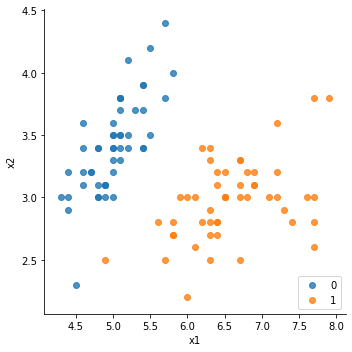

In [3]:
dviz.DDScatterDFSns(0, 1, df)

In [4]:
clf = LogisticRegression(solver='lbfgs')
max_depth = 4

In [5]:
# best split
def best_split(rows, clf):
    #clf = LogisticRegression(solver='lbfgs')

    # rows[0]: features, rows[1]:label

    clf.fit(rows[0], rows[1])

    theta = np.append(clf.coef_, clf.intercept_)
    pred = clf.predict(rows[0])

    return clf, theta, pred


def partition(rows, pred):
    left_rows = np.where(pred > 0)
    right_rows = np.where(pred <= 0)

    # check node's purity
    # pos_idx = np.where(y[true_rows] == 1)
    # neg_idx = np.where(y[side] == 0)

    Xl = rows[0][left_rows]
    yl = rows[-1][left_rows]

    Xr = rows[0][right_rows]
    yr = rows[-1][right_rows]

    return [Xl, yl], [Xr, yr]

def print_tree(node,indentation=""):
    '''printing function'''
    #base case means we have reached the leaf
    #if the node object is of leaf type
    if isinstance(node,Leaf):
        print(indentation+"PREDICTION"+str(node.question)+">= 0")
        return 
    #print the question at node
    print(indentation + str(node.question)+">= 0")
    
    #call the function on true branch 
    print(indentation+ "Left Branch")
    print_tree(node.true_branch,indentation + "-->")
    
    #on flase branch
    print(indentation+ "Right Branch")
    print_tree(node.false_branch,indentation + "-->")

In [6]:
# best feature selection for a node
# min feature 2
def best_feature_selection(input_features):
    # for now best feature are frist and second columns
    return np.column_stack((input_features[:, 0], input_features[:, 1]))

In [7]:
x_best = best_feature_selection(x)
x_best[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [8]:
# for now best features are x1, and x2
def build_tree(rows, depth=1):    
    
    model, theta, pred = best_split([x_best, y], clf)    
    
    if depth >= max_depth:
        return Leaf(theta, rows)
    
    
    pos_idx = np.where(y[rows[-1]] == 1)
    neg_idx = np.where(y[rows[-1]] == 0)
    
    if len(pos_idx[0]) < 20 and len(neg_idx[0]) < 20:        
        return Leaf(theta, rows)        
        
    true_rows, false_rows = partition([x, y], pred)
    
    tunique, tcounts = np.unique(true_rows[-1], return_counts=True)
    funique, fcounts = np.unique(false_rows[-1], return_counts=True)
    
    if len(tcounts) == 1 or len(fcounts) == 1:
        #make a leaf object and return
        return Leaf(theta, rows)
    
    if len(true_rows[-1]) > 20 and len(false_rows[-1]) > 20:
    #if tcounts[0] > 20 and tcounts[1] > 20 or fcounts[0] > 20 and fcounts[1] > 20:
        
        true_branch = build_tree(true_rows, depth+1)            
        false_branch = build_tree(false_rows, depth+1)
        
        return DecisionNode(theta, true_branch, false_branch, rows)
    else: 
        return Leaf(theta, rows)

In [9]:
tree = build_tree([x_best, y])

In [10]:
print_tree(tree)

PREDICTION[  3.15917172  -2.2137433  -10.86320465]>= 0


In [11]:
# how to predict ?
# we have to make same process as classic decision tree 
# check from root node to left with each decision boundary feature value

model.score(x_best, y)

NameError: name 'model' is not defined